<a href="https://colab.research.google.com/github/Shariq29/Pytorch_Demo/blob/main/Pytorch_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Basics: Tensors & Gradients

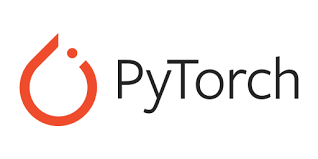



  PyTorch is an open-source machine learning framework that is primarily used for developing and training deep learning models. It was developed by Facebook's AI Research Lab and released in 2016. PyTorch provides a flexible and dynamic approach to building neural networks, making it a popular choice among researchers and developers.

The framework is built on a dynamic computational graph concept, which means that the graph is built and modified on-the-fly as the program runs. This allows for more intuitive and flexible model development, as you can use standard Python control flow statements and debug the model easily.

PyTorch supports automatic differentiation, which enables efficient computation of gradients for training neural networks using backpropagation. It provides a rich set of tools and libraries for tasks such as data loading, model building, optimization, and evaluation.

One of the key advantages of PyTorch is its support for GPU acceleration, allowing you to train models on GPUs to significantly speed up computations. It also has a large and active community, which means there are plenty of resources, tutorials, and pre-trained models available.

PyTorch is often compared to TensorFlow, another popular deep learning framework. While TensorFlow focuses more on static computation graphs, PyTorch emphasizes dynamic computation graphs. This fundamental difference in design philosophy gives PyTorch an edge when it comes to flexibility and ease of use.

Overall, PyTorch is widely used in the research community and is gaining popularity in industry applications as well. It provides a powerful and user-friendly platform for building and training deep learning models.



In [1]:
import torch

# Tensors

In [2]:
# Number/Scalar

t1 = torch.tensor(4.)
t1

# 4. is a shorthand notation for 4.0

tensor(4.)

In [3]:
t1.dtype

torch.float32

In [4]:
#Vector
t2 = torch.tensor([1., 2, 3, 4])
t2

tensor([1., 2., 3., 4.])

In [5]:
# Matrix
t3 = torch.tensor([
    [5., 6],
    [7,8],
    [9,10]
])
t3

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])

In [6]:
# 3 dimensional array
t4 = torch.tensor([
    [
        [11, 12, 13],
        [14, 15, 16]
    ],
    [
        [17,18,19],
        [20,21,22]
    ]
])

t4

tensor([[[11, 12, 13],
         [14, 15, 16]],

        [[17, 18, 19],
         [20, 21, 22]]])

In [7]:
print(t1)
t1.shape

tensor(4.)


torch.Size([])

In [8]:
print(t2)
t2.shape

tensor([1., 2., 3., 4.])


torch.Size([4])

In [9]:
print(t3)
t3.shape

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])


torch.Size([3, 2])

In [10]:
print(t4)
t4.shape

tensor([[[11, 12, 13],
         [14, 15, 16]],

        [[17, 18, 19],
         [20, 21, 22]]])


torch.Size([2, 2, 3])

# Tensor operation and gradients

In [11]:
# Create tensors

x = torch.tensor(3.)
w = torch.tensor(4. , requires_grad = True)
b = torch.tensor(5., requires_grad = True)

x, w, b

(tensor(3.), tensor(4., requires_grad=True), tensor(5., requires_grad=True))

In [12]:
# Arithemitc operations

y = w*x + b
y

tensor(17., grad_fn=<AddBackward0>)

In [13]:
# Compute derivates
y.backward()

In [14]:
# Display gradients
print("dy/dx: " ,x.grad)
print("dy/dw: ", w.grad)
print("dy/db: ", b.grad)


dy/dx:  None
dy/dw:  tensor(3.)
dy/db:  tensor(1.)


# Tensor functions

In [15]:
# Create a tensor with a fixed value for every elemnt

t6 = torch.full((3,2), 42)
t6

tensor([[42, 42],
        [42, 42],
        [42, 42]])

In [16]:
# Concatinate two tensors with compatible shapes
t7 = torch.cat((t3, t6))
t7

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.],
        [42., 42.],
        [42., 42.],
        [42., 42.]])

In [17]:
# change the sin of each element
t8 = torch.sin(t7)
t8

tensor([[-0.9589, -0.2794],
        [ 0.6570,  0.9894],
        [ 0.4121, -0.5440],
        [-0.9165, -0.9165],
        [-0.9165, -0.9165],
        [-0.9165, -0.9165]])

In [18]:
# change the shape of a tensor

t9 = t8.reshape(3,2,2)
t9

tensor([[[-0.9589, -0.2794],
         [ 0.6570,  0.9894]],

        [[ 0.4121, -0.5440],
         [-0.9165, -0.9165]],

        [[-0.9165, -0.9165],
         [-0.9165, -0.9165]]])

# Interoperability with Numpy

In [19]:
import numpy as np

x = np.array([[1,2], [3, 4.]])
x

array([[1., 2.],
       [3., 4.]])

In [20]:
y = torch.from_numpy(x)
y

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

In [21]:
x.dtype, y.dtype

(dtype('float64'), torch.float64)

In [22]:
z = y.numpy()
z

array([[1., 2.],
       [3., 4.]])

# Linear Regression from Scratch using pytorch

In [23]:
import numpy as np
import torch

In [24]:
# Making training data
# Input ---> (temp, rainfall, humidity) ---> yield of apple and oranges crops

inputs = np.array([
    [73, 67,43],
    [91, 88, 64],
    [87, 134, 58],
    [102, 43, 37],
    [69, 96, 70],
], dtype = 'float32')

In [25]:
# Target (apples, oranges)

target = np.array([
    [56, 70],
    [81, 101],
    [119, 113],
    [22, 37],
    [103, 119]
], dtype = 'float32')

In [26]:
# Convert inputs and target to tensors

inputs = torch.from_numpy(inputs)
target = torch.from_numpy(target)

print(inputs)
print(target)



tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 113.],
        [ 22.,  37.],
        [103., 119.]])


In [27]:
# Weights and biases
w = torch.randn(2, 3, requires_grad = True)
b = torch.randn(2, requires_grad = True)

print(w)
print(b)


tensor([[-0.4292, -0.3286, -0.5471],
        [-1.1377, -0.2925, -0.1270]], requires_grad=True)
tensor([1.5988, 0.9127], requires_grad=True)


In [28]:
# define the model

# Z = X * W + B
def model(x):
  return x @ w.t() + b



In [29]:
# prediction
preds = model(inputs)
print(preds)

tensor([[ -75.2748, -107.1955],
        [-101.3905, -136.4832],
        [-111.5085, -144.6250],
        [ -76.5506, -132.4061],
        [ -97.8607, -114.5564]], grad_fn=<AddBackward0>)


In [30]:
# loss funtion we will use is MSE -> Mean squared error
def MSE(y, y_hat):
  diff = y - y_hat

  return torch.sum(diff*diff)/diff.numel()

In [31]:
# error
loss = MSE(target, preds)
print(loss)

tensor(39110.4922, grad_fn=<DivBackward0>)


In [32]:
#Compute gradients
loss.backward()

In [33]:
print(w)
print(w.grad)

tensor([[-0.4292, -0.3286, -0.5471],
        [-1.1377, -0.2925, -0.1270]], requires_grad=True)
tensor([[-14029.2764, -15850.8428,  -9678.7842],
        [-18070.8867, -19399.6504, -12075.5117]])


In [34]:
print(b)
print(b.grad)

tensor([1.5988, 0.9127], requires_grad=True)
tensor([-168.7170, -215.0533])


In [35]:
#reset grad
w.grad.zero_()
b.grad.zero_()

print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


In [36]:
# Adjust params

preds = model(inputs)

print(preds)


loss = MSE(target, preds)
print(loss)

tensor([[ -75.2748, -107.1955],
        [-101.3905, -136.4832],
        [-111.5085, -144.6250],
        [ -76.5506, -132.4061],
        [ -97.8607, -114.5564]], grad_fn=<AddBackward0>)
tensor(39110.4922, grad_fn=<DivBackward0>)


In [37]:
loss.backward()

print(w.grad)
print(b.grad)

tensor([[-14029.2764, -15850.8428,  -9678.7842],
        [-18070.8867, -19399.6504, -12075.5117]])
tensor([-168.7170, -215.0533])


In [38]:
# adjust weight & reset grad

learning_rate = 1e-5

with torch.no_grad():
  w -= w.grad * 1e-5
  b -= b.grad * 1e-5

  w.grad.zero_()
  b.grad.zero_()

In [39]:
print(w)
print(b)

tensor([[-0.2889, -0.1701, -0.4503],
        [-0.9570, -0.0985, -0.0063]], requires_grad=True)
tensor([1.6005, 0.9149], requires_grad=True)


In [40]:
# Calculate again

preds = model(inputs)
loss = MSE(target, preds)
print(loss)

tensor(26449.9785, grad_fn=<DivBackward0>)


In [41]:
# Training for muliple epochs
for i in range(400):
  preds = model(inputs)
  loss = MSE(target, preds)
  loss.backward()
  with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5

    w.grad.zero_()
    b.grad.zero_()
  print(f"Epochs({i}/{100}) & Loss {loss}")

Epochs(0/100) & Loss 26449.978515625
Epochs(1/100) & Loss 17917.29296875
Epochs(2/100) & Loss 12166.302734375
Epochs(3/100) & Loss 8289.8671875
Epochs(4/100) & Loss 5676.6806640625
Epochs(5/100) & Loss 3914.788330078125
Epochs(6/100) & Loss 2726.58154296875
Epochs(7/100) & Loss 1924.986083984375
Epochs(8/100) & Loss 1383.9320068359375
Epochs(9/100) & Loss 1018.4638671875
Epochs(10/100) & Loss 771.33056640625
Epochs(11/100) & Loss 603.9520263671875
Epochs(12/100) & Loss 490.3294372558594
Epochs(13/100) & Loss 412.94207763671875
Epochs(14/100) & Loss 359.9828796386719
Epochs(15/100) & Loss 323.4953918457031
Epochs(16/100) & Loss 298.1177062988281
Epochs(17/100) & Loss 280.23614501953125
Epochs(18/100) & Loss 267.4156799316406
Epochs(19/100) & Loss 258.01495361328125
Epochs(20/100) & Loss 250.9281005859375
Epochs(21/100) & Loss 245.40963745117188
Epochs(22/100) & Loss 240.95693969726562
Epochs(23/100) & Loss 237.23123168945312
Epochs(24/100) & Loss 234.00439453125
Epochs(25/100) & Loss 23

In [42]:
preds = model(inputs)
loss = MSE(target, preds)
print(loss)

tensor(34.4574, grad_fn=<DivBackward0>)


In [43]:
from math import sqrt
sqrt(loss)

/tmp/ipython-input-3167310485.py:2: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  sqrt(loss)


5.870043672727364

In [44]:
preds

tensor([[ 58.3421,  67.8082],
        [ 79.2211,  95.8779],
        [123.5967, 123.1313],
        [ 25.9815,  40.9119],
        [ 94.1830, 110.5019]], grad_fn=<AddBackward0>)

In [45]:
target

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 113.],
        [ 22.,  37.],
        [103., 119.]])

# Fashion MNIST Neural Net example using Pytorch

In [46]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt


In [47]:
# Download training data from open datasets

training_data = datasets.FashionMNIST(
    root = 'data',
    train= True,
    download = True,
    transform = ToTensor(),
)

# Download test data from open datasets

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download = True,
    transform = ToTensor(),
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.3MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 192kB/s]
100%|██████████| 4.42M/4.42M [00:02<00:00, 1.56MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 25.1MB/s]


In [48]:
type(training_data)

torchvision.datasets.mnist.FashionMNIST

In [49]:
batch_size = 64

# Create data loaders

train_dataloader = DataLoader(training_data, batch_size = batch_size)
test_dataloader = DataLoader(test_data, batch_size = batch_size)

for X, y in test_dataloader:
  print("Shape of X [N, C, H, W] ", X.shape)
  print("Shape of y: ", y.shape, y.dtype)
  break

Shape of X [N, C, H, W]  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


In [50]:
# Get cpu or gpu device for training

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [51]:
# Define the NN Model
class NeuralNetwork(nn.Module):

  def __init__(self):
    super(NeuralNetwork, self).__init__()

    self.flatten = nn.Flatten()

    # Hidden Layers with ReLU activation function
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10) # Output layer
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits


model= NeuralNetwork().to(device)

print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [52]:
# Cross Entropy Loss ----> Because it is a multiclass classification problem

loss_fn = nn.CrossEntropyLoss()

# Optimizer ---> SGD ---> Stochastic Gradient Descent
# lr = Learning Rate
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)

In [53]:
# Model Training

def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  model.train()

  for batch, (X, y) in enumerate(dataloader):
    X, y= X.to(device), y.to(device) # related to gpu computation

    # Compute prediction error
    pred = model(X)
    loss = loss_fn(pred, y)

    # BackPropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch %100 ==0 :
      loss, current = loss.item(), batch * len(X)
      print(f"Loss: {loss} [{current}/{size}]")

In [54]:
def test(dataloader, model, loss_fn):
  size = len(dataloader.dataset)

  num_batches = len(dataloader)

  model.eval()

  test_loss, correct = 0, 0

  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)

      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= num_batches # average loss per batch
  correct /= size # %age of correct predictions or accuracy

  print(f"Test Error: \n Accuracy: {100*correct} %, Avg loss {test_loss}\n")




In [55]:
epochs = 1
for t in range(epochs):
  print(f"Epoch {t+1} \n --------------------------")
  train(train_dataloader, model, loss_fn, optimizer)
  test(test_dataloader, model, loss_fn)

print("Done\n")

Epoch 1 
 --------------------------
Loss: 2.305448293685913 [0/60000]
Loss: 2.2888269424438477 [6400/60000]
Loss: 2.2740893363952637 [12800/60000]
Loss: 2.2647652626037598 [19200/60000]
Loss: 2.252135753631592 [25600/60000]
Loss: 2.2191739082336426 [32000/60000]
Loss: 2.2279558181762695 [38400/60000]
Loss: 2.196333408355713 [44800/60000]
Loss: 2.1869893074035645 [51200/60000]
Loss: 2.150482416152954 [57600/60000]
Test Error: 
 Accuracy: 43.24 %, Avg loss 2.149875982551818

Done



In [56]:
#save model
torch.save(model.state_dict(), "model.pth")
print("Saved model state to model.pth")

Saved model state to model.pth


In [57]:
## Prediction

classes = [
    "T-shirt/top",

"Trouser",

"Pullover",

"Dress",

"Coat",

"Sandal",

"Shirt",

"Sneaker",

"Bag",

"Ankle boot"

]


model.eval()

x, y = test_data[10][0], test_data[10][1]
x = x.to(device)
# y = y.to(device)
with torch.no_grad():
  pred = model(x)
  predicted, actual = classes[pred[0].argmax(0)], classes[y]

  print(f"Predicted: {predicted} Actual: {actual}")




Predicted: Coat Actual: Coat


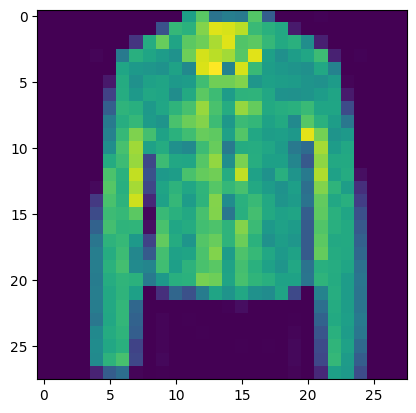

In [58]:
import matplotlib.pyplot as plt

# Assuming 'x' contains the image data
plt.imshow(x.cpu().squeeze())  # Move tensor to CPU if using GPU
plt.show()